# EDA and Data Wrangling

## Revisiting the Reservations

---

Originally, I used this notebook to perform EDA with the intention of using the dataset only for classifying whether a reservation would cancel.

Now, as part of my efforts to revisit and revamp this overall repository and workflow, I am adapting it for broader uses, such as regression modeling and time series forecasting.

The end goal is to have a comprehensive overview of the data and to be flexible enough to handle different workflows.

**Warning: Work-in-Progress**

As this is a revamp of the original workbook, some of the code and comments may be outdated. I intend to update and clarify all steps in time, but there may be some parts that are out of place while I clean things up.

---

**Of Demand and Cancellations**

*This was the initial intro to the notebook with a focus on classification modeling.*

>**Every aspect of hospitality depends on accurately anticipating business demand**: how many rooms to clean; how many rooms are available to sell; what would be the best rate; and how to bring it all together to make every guest satisfied. 
>
> Proper forecasting is critical to every department and staff member, and to generate our forecasts, **hotel managers need to know how many guests will cancel prior to arrival**. Using data from two European hotels, I developed a model to predict whether a given reservation would cancel based on 30 different reservation details.

**In order to develop and train my models, I need to prepare the data in advance.**

>In this notebook, I explore the original dataset and its features; condense several features into smaller subsets; engineer new features; and remove unwanted features from the data.
>
**Once the data is prepared, I will reload the data in a new notebook to create and train my models to determine my predictions of who will stay and who will cancel.**

# Import Packages

In [2]:
## Used to re-import custom functions during development
%load_ext autoreload
%autoreload 2

In [3]:
## Enabling access to custom functions in separate directory

# Import necessary modules
import os
import sys

# Construct the absolute path to the 'src' directory
src_path = os.path.abspath(os.path.join('../..', 'src'))

# Append the path to 'sys.path'
if src_path not in sys.path:
    sys.path.append(src_path)

import db_utils, eda

## Data Handling
import numpy as np
import pandas as pd

## Visualizations
import matplotlib.pyplot as plt
import sweetviz as sv

c:\Users\Ben\miniforge3\envs\ds-env\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
## Settings
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: f'{x:,.2f}')
pd.set_option('display.max_rows', 50)
%matplotlib inline

# Read Source Data (with UUIDs)

In [5]:
# # Path to the DuckDB database file
# db_path = '../data/hotel_reservations.duckdb'

# ## Select subset of data for review
# q = 'SELECT * FROM res_data LIMIT 5'

# with db_utils.duckdb_connection(db_path) as conn:
#     data = conn.execute(q).df()
    
# data.head()

## Read Initial Data

In [6]:
path = '../../data/source/full_data.feather'

data = pd.read_feather(path)

data.head()

,IsCanceled,LeadTime,ArrivalDateYear,ArrivalDateMonth,ArrivalDateWeekNumber,ArrivalDateDayOfMonth,StaysInWeekendNights,StaysInWeekNights,Adults,Children,Babies,Meal,Country,MarketSegment,DistributionChannel,IsRepeatedGuest,PreviousCancellations,PreviousBookingsNotCanceled,ReservedRoomType,AssignedRoomType,BookingChanges,DepositType,Agent,Company,DaysInWaitingList,CustomerType,ADR,RequiredCarParkingSpaces,TotalOfSpecialRequests,ReservationStatus,ReservationStatusDate,HotelNumber
0,0,342,2015,July,27,1,0,0,2,0.00,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NULL,NULL,0,Transient,0.00,0,0,Check-Out,2015-07-01,H1
1,0,737,2015,July,27,1,0,0,2,0.00,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NULL,NULL,0,Transient,0.00,0,0,Check-Out,2015-07-01,H1
2,0,7,2015,July,27,1,0,1,1,0.00,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NULL,NULL,0,Transient,75.00,0,0,Check-Out,2015-07-02,H1
3,0,13,2015,July,27,1,0,1,1,0.00,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304,NULL,0,Transient,75.00,0,0,Check-Out,2015-07-02,H1
4,0,14,2015,July,27,1,0,2,2,0.00,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240,NULL,0,Transient,98.00,0,1,Check-Out,2015-07-03,H1


## DEPRECATED: Add Pre-Engineered Date Features

***DEPRECATED PENDING UPDATE/FIX***

In [7]:
# filepath = '../data/engineered_data_dates.parquet'

# df_dates = pd.read_parquet(filepath)
# df_dates.head()

## DEPRECATED: Condense to Single DataFrame

In [8]:
# data = data.merge(right = df_dates, how = 'left', on = 'UUID')
# data.head()

In [9]:
# data.info()

## DEPRECATED: Dropping Select Features

*Some features were used to engineer new features - particularly arrival details.*

In [10]:
# drop_feats = ['UUID','LeadTime', 'ArrivalDateYear', 'ArrivalDateMonth', 'ArrivalDateWeekNumber',
#               'ArrivalDateDayOfMonth', 'StaysInWeekendNights', 'StaysInWeekNights',
#               'ReservationStatusDate_x', 'ReservationStatusDate_y']
# drop_feats

In [11]:
# data = data.drop(columns = drop_feats)
# data.head()

# Abbreviated EDA

---

- Original notebook reviewed each feature in depth
- Abbreviating review for simplicity.

---

## EDA via Sweetviz Report

Feature: HotelNumber                         |██████████| [100%]   00:04 -> (00:00 left)



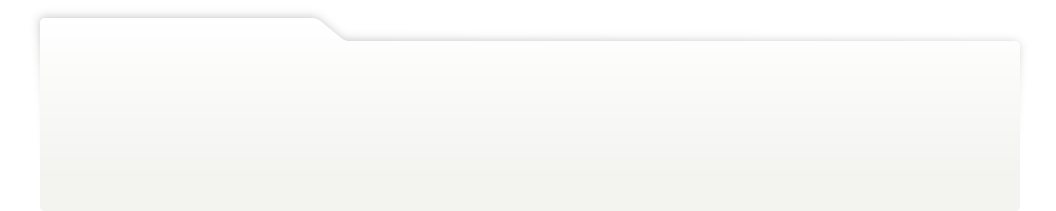
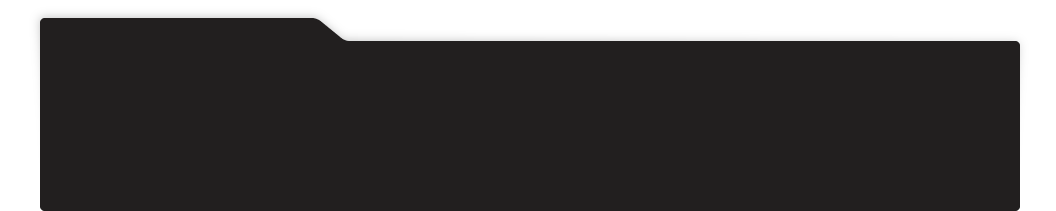
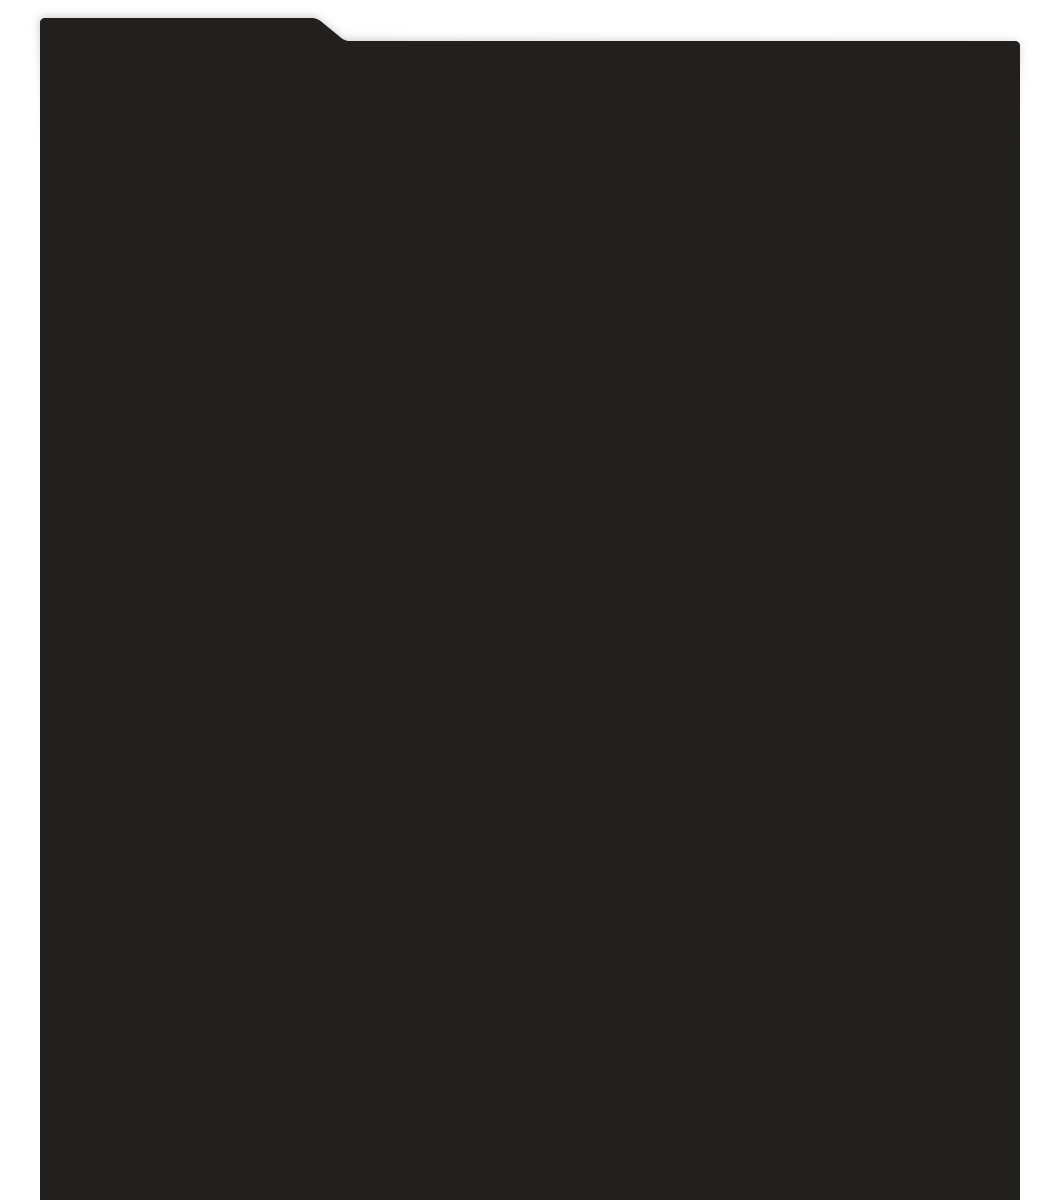
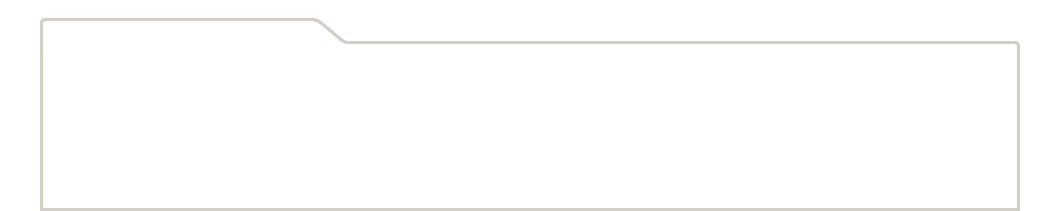
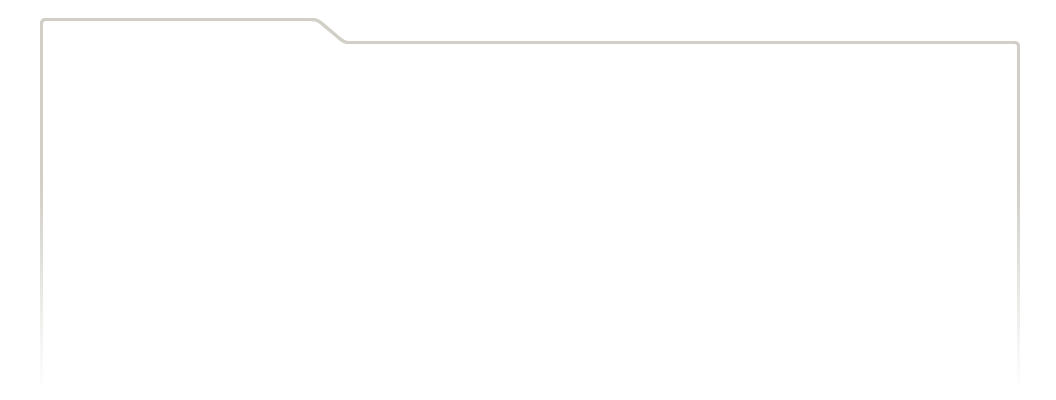
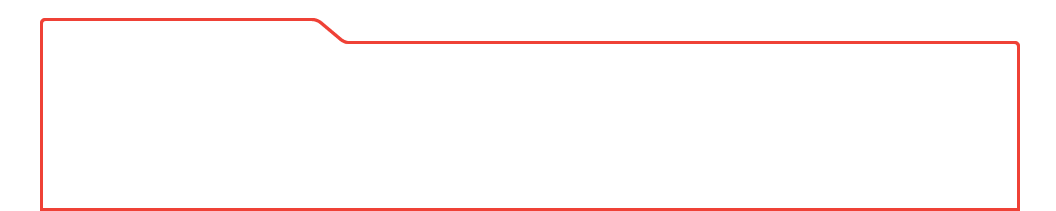
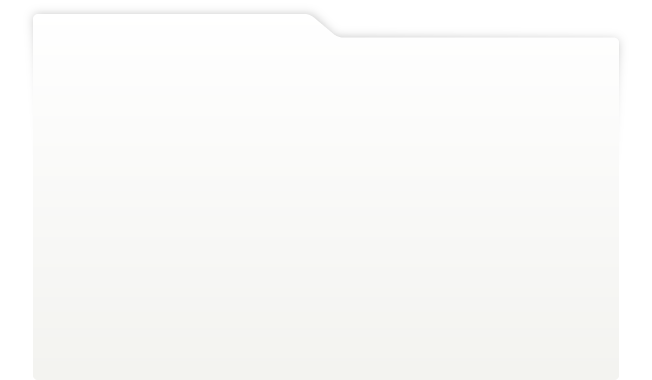
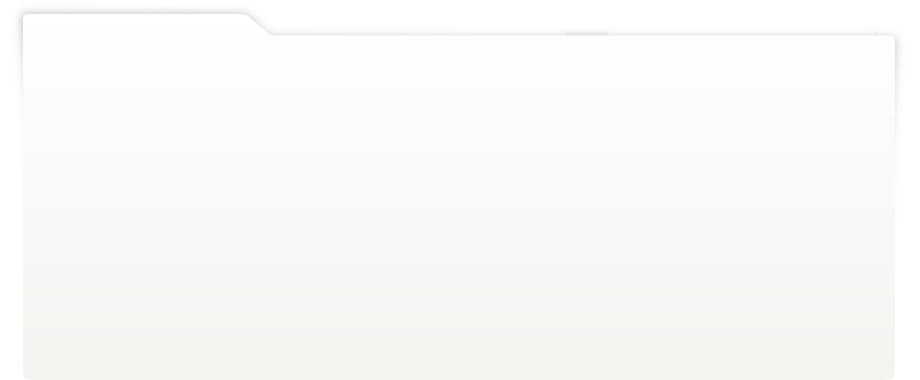
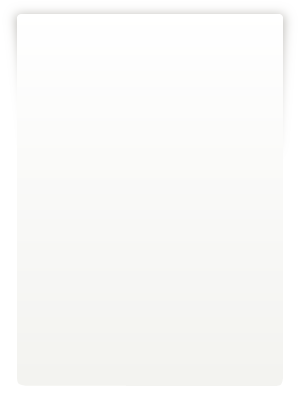
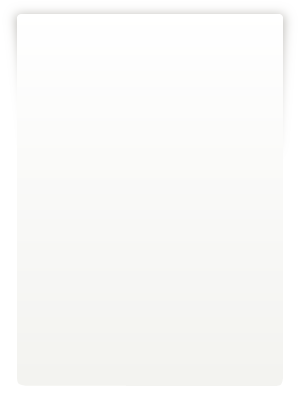
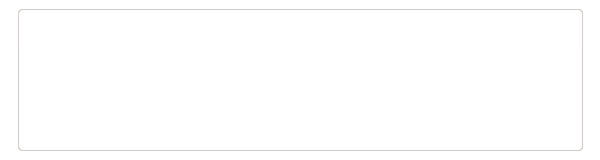
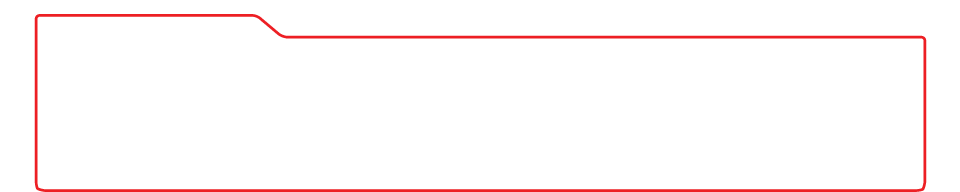
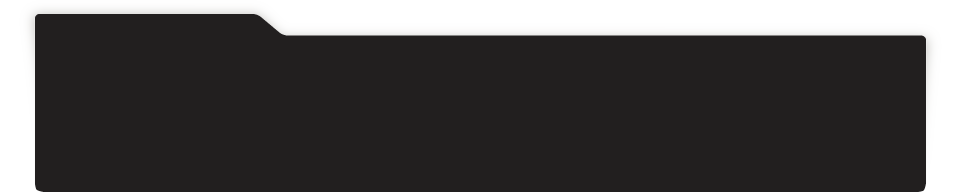
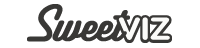
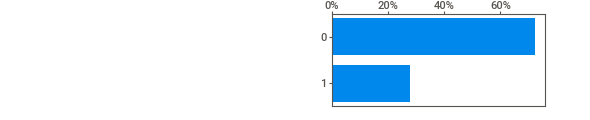
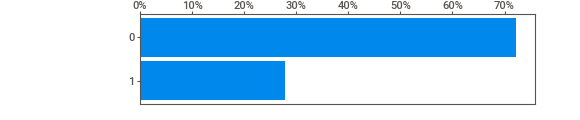
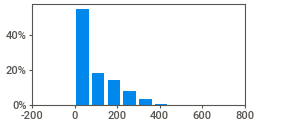
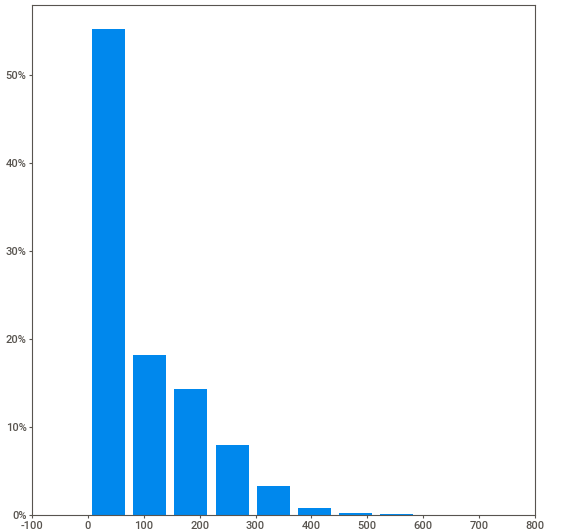
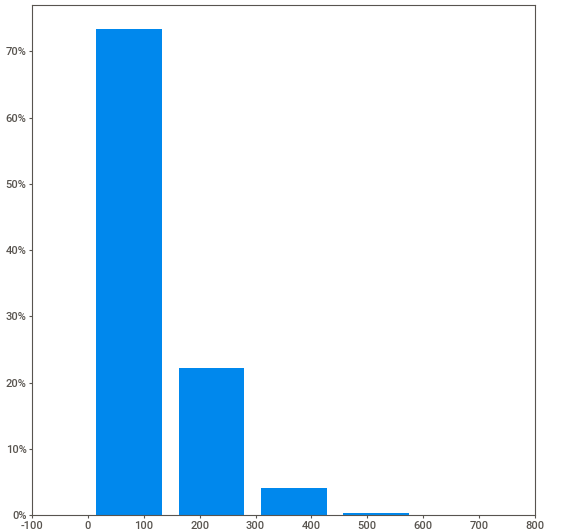
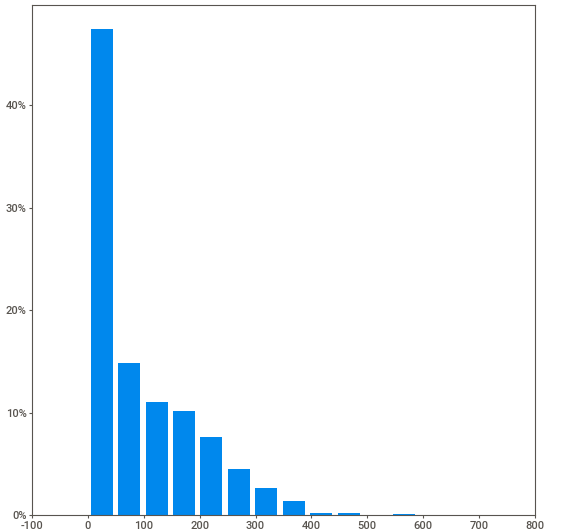
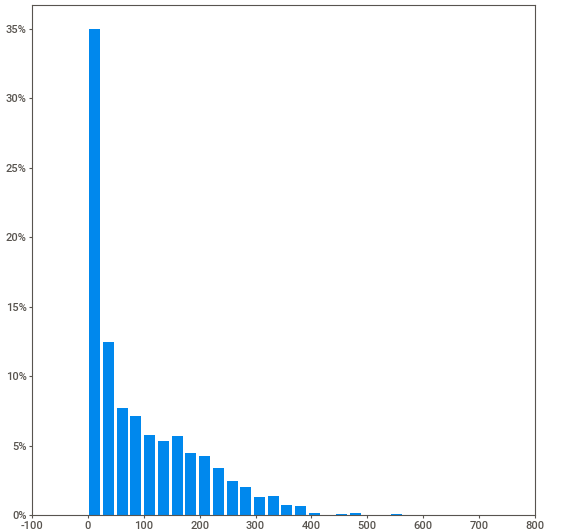
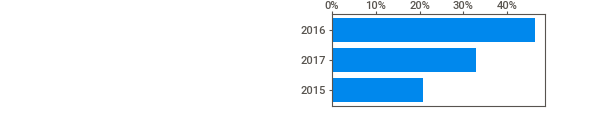
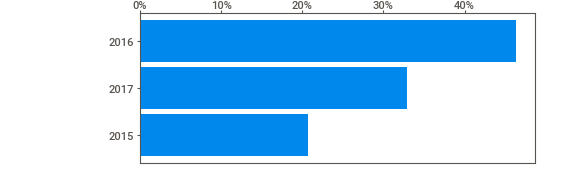
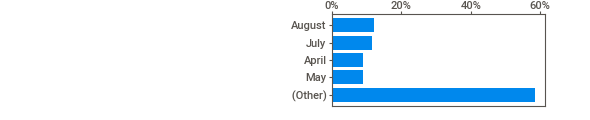
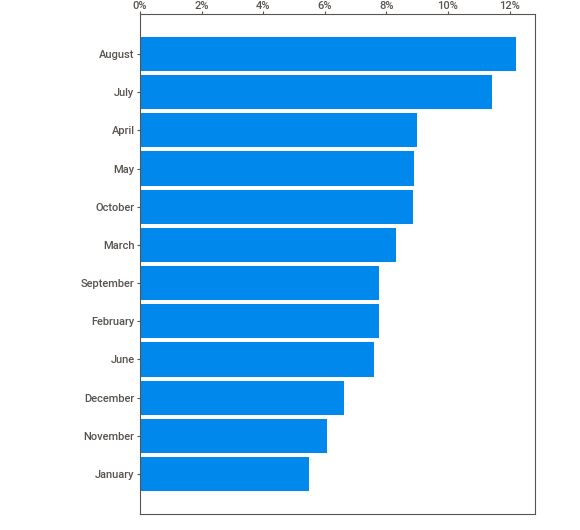
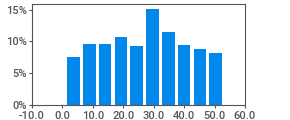
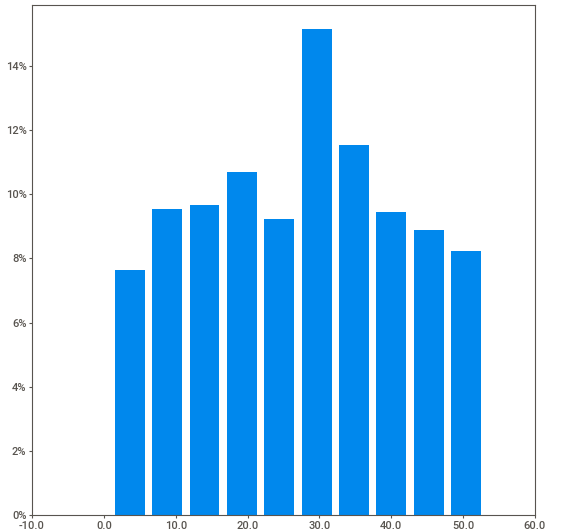
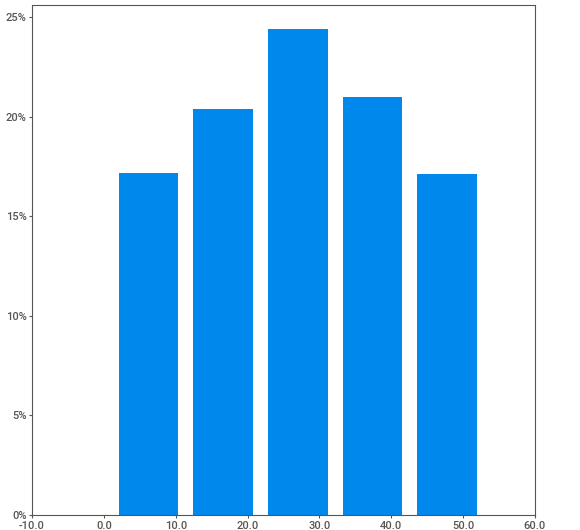
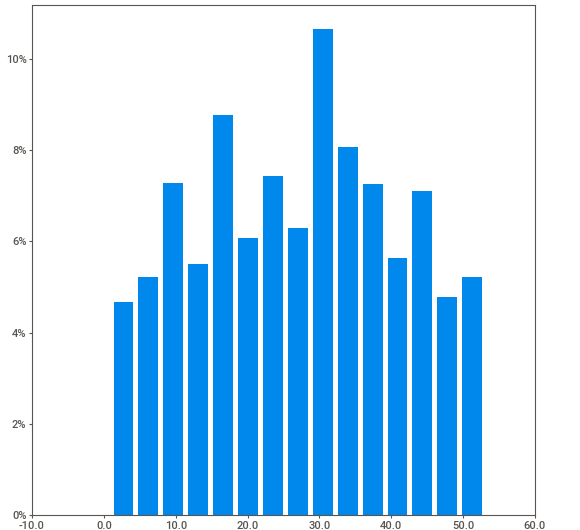
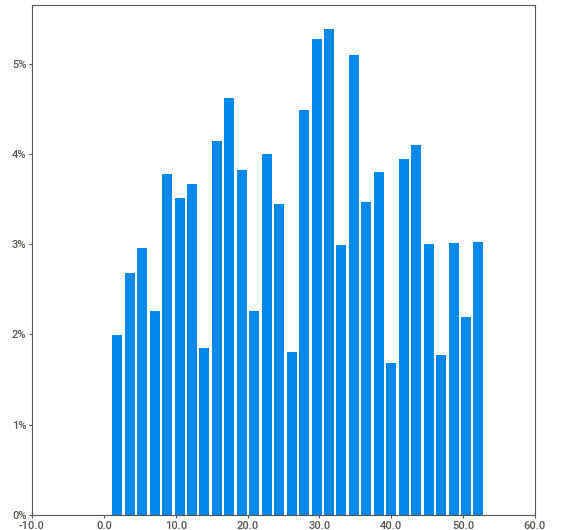
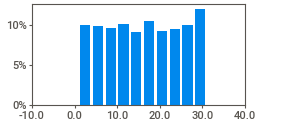
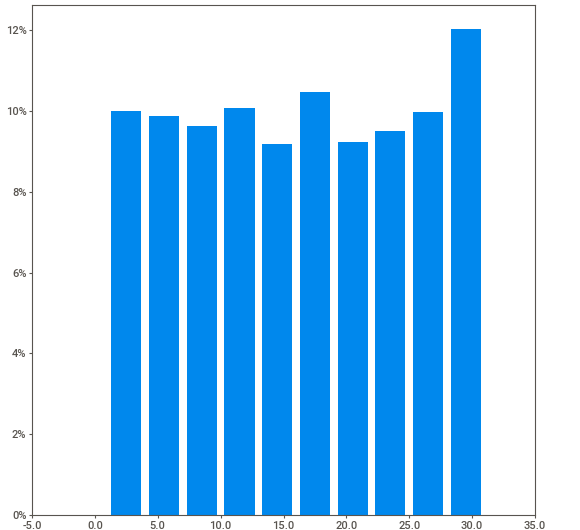
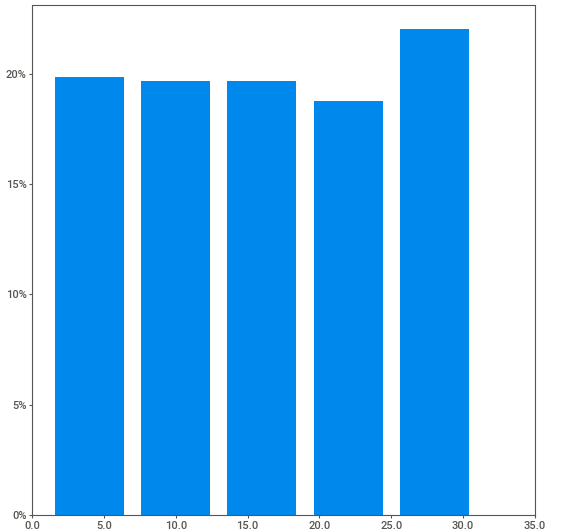
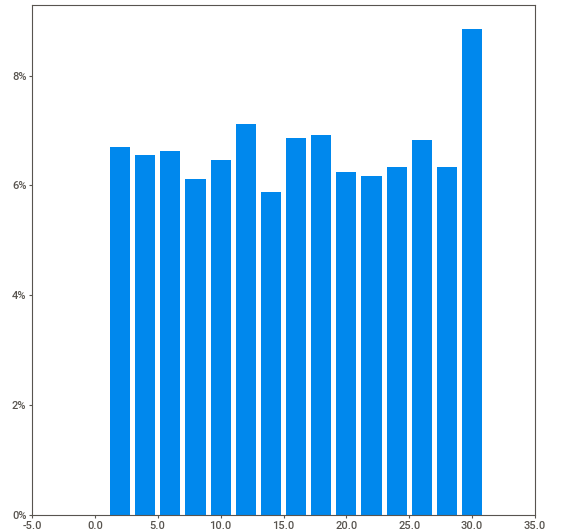
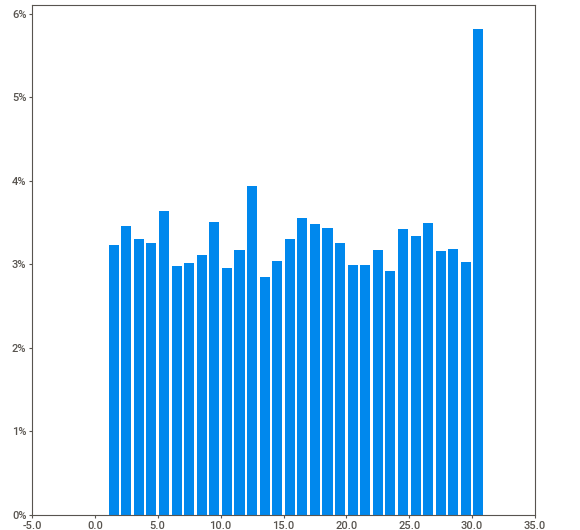
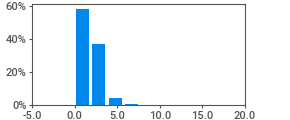
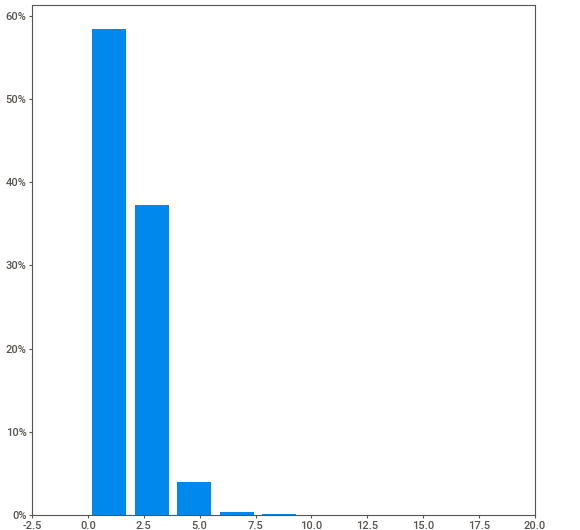
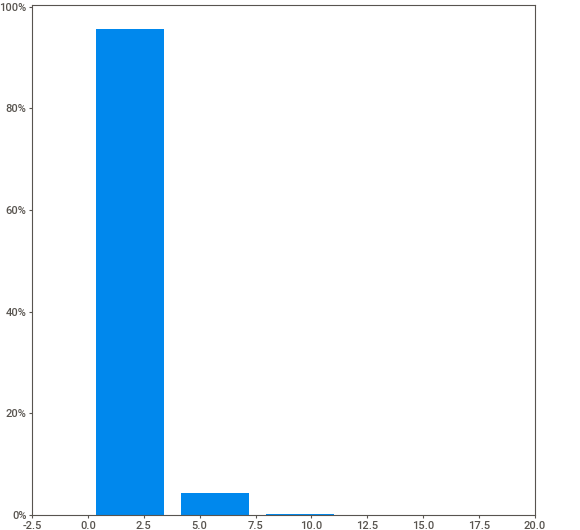
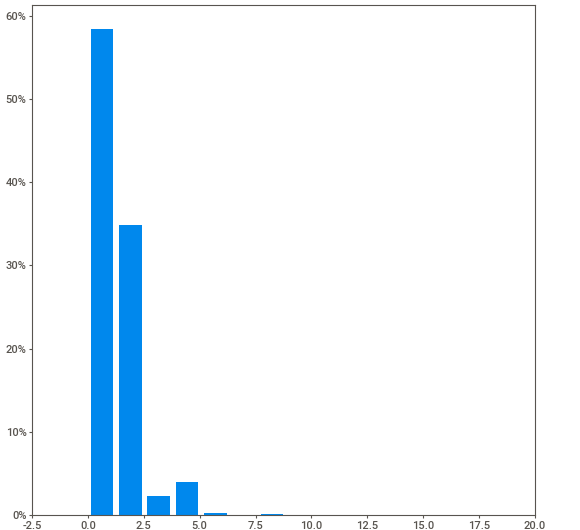
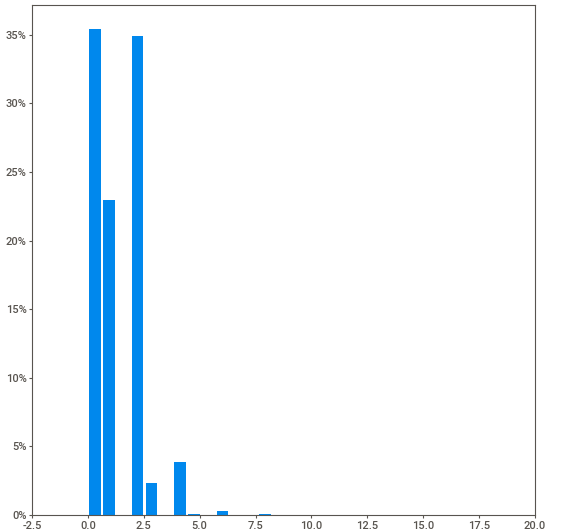
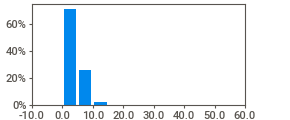
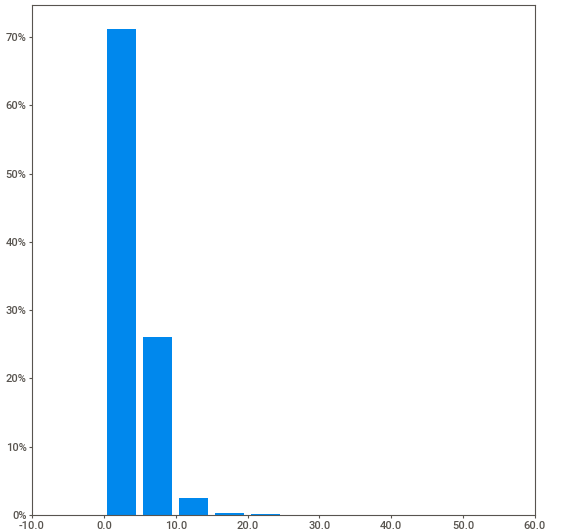
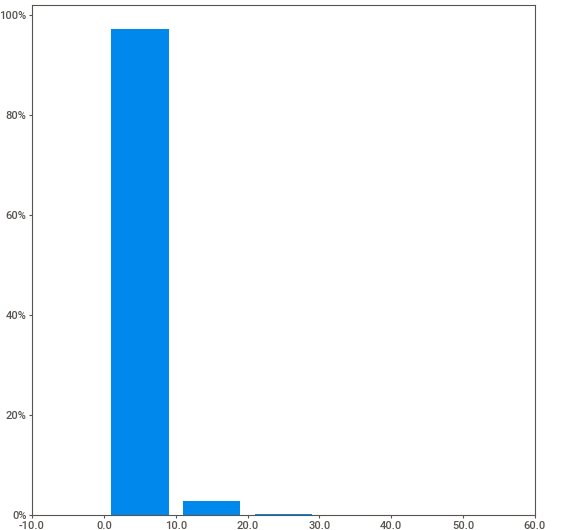
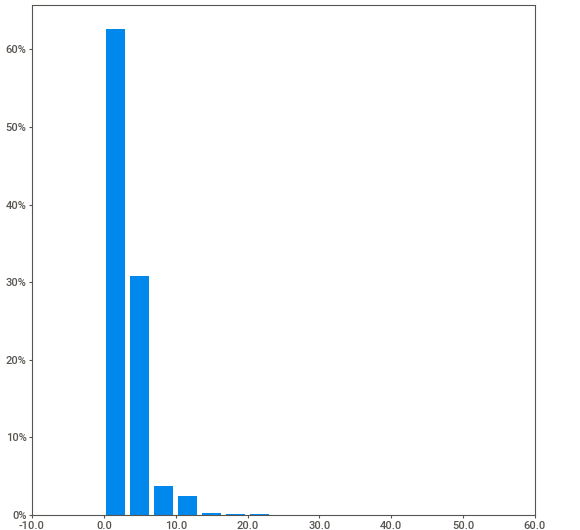
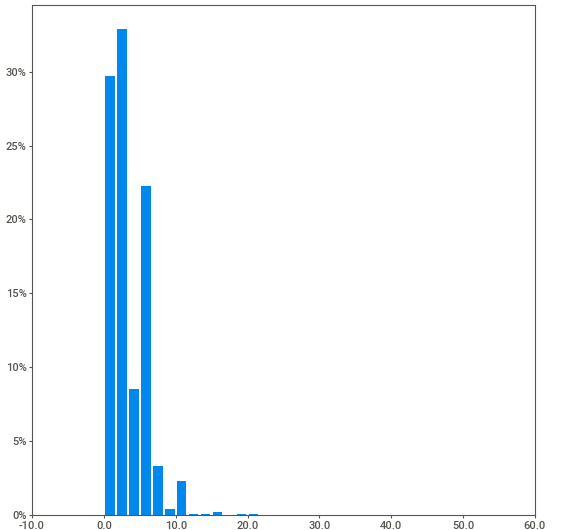
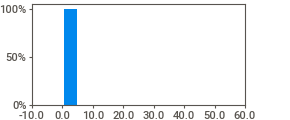
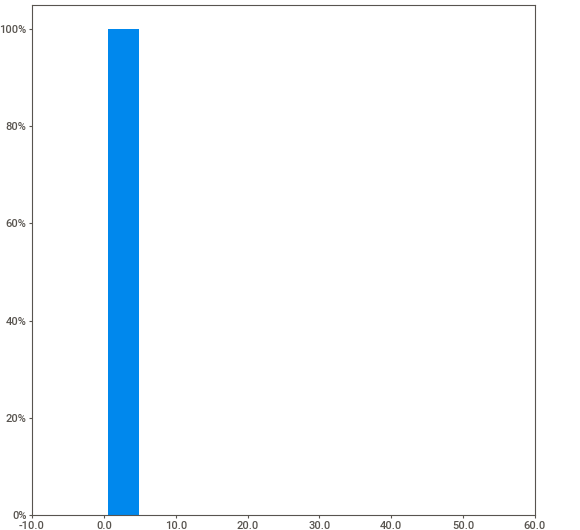
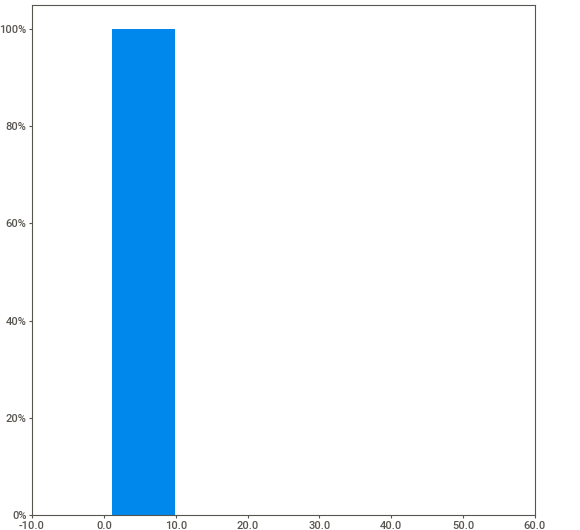
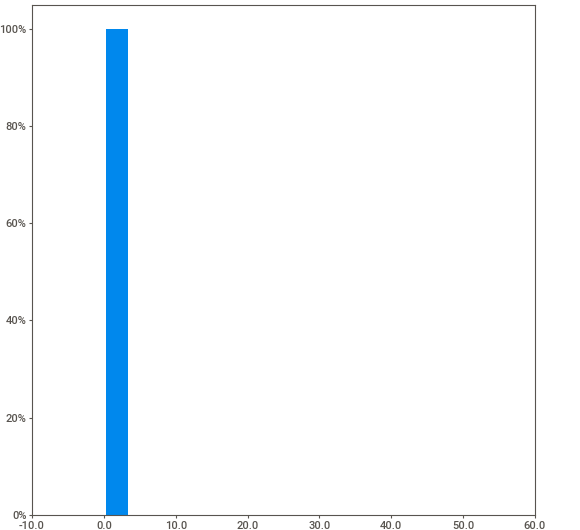
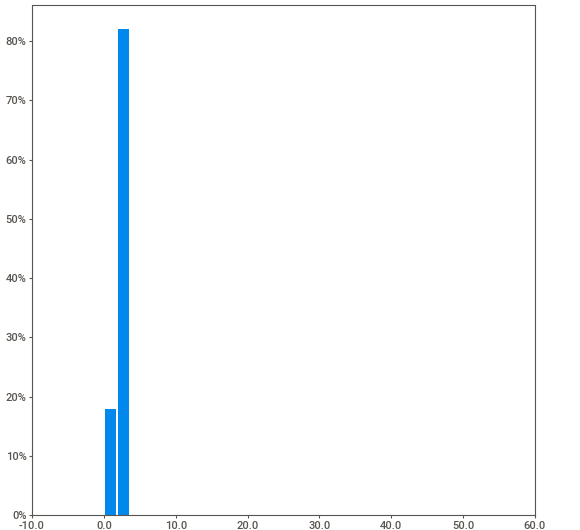
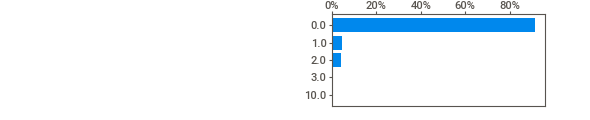
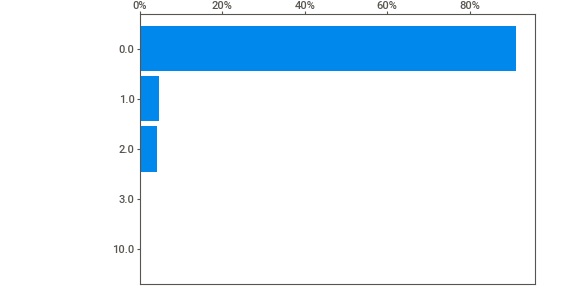
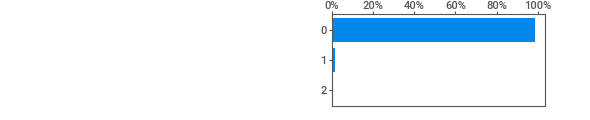
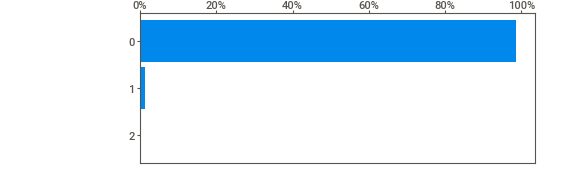
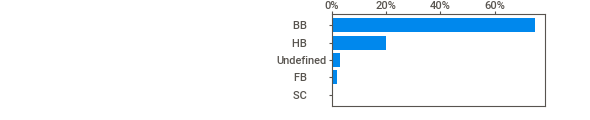
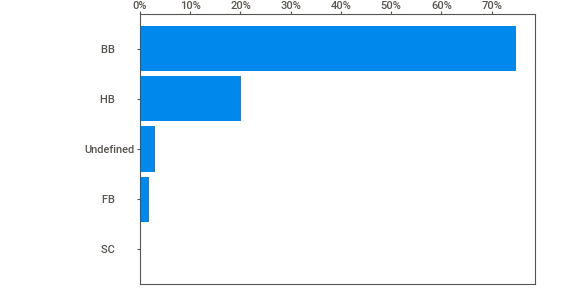
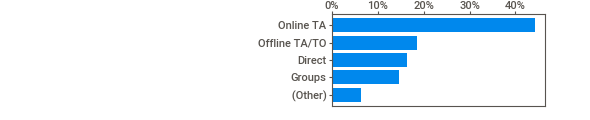
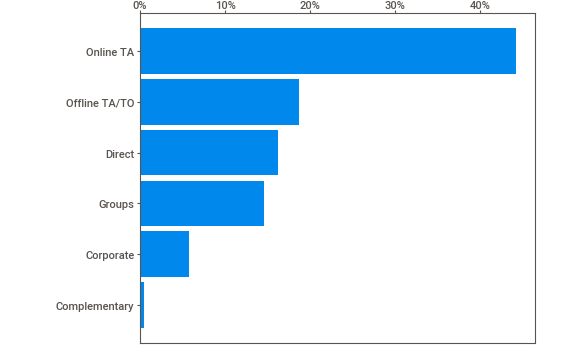
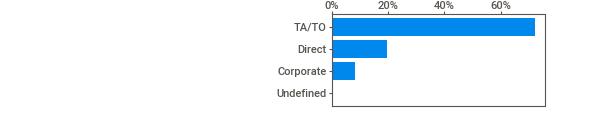
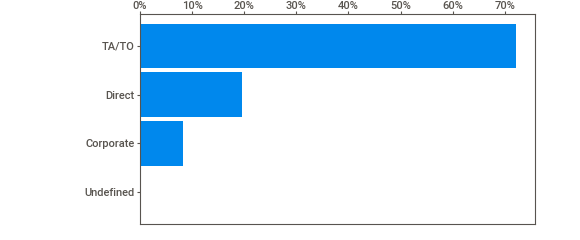
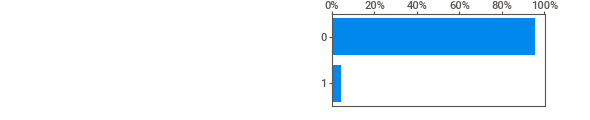
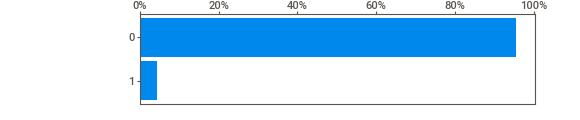
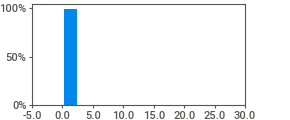
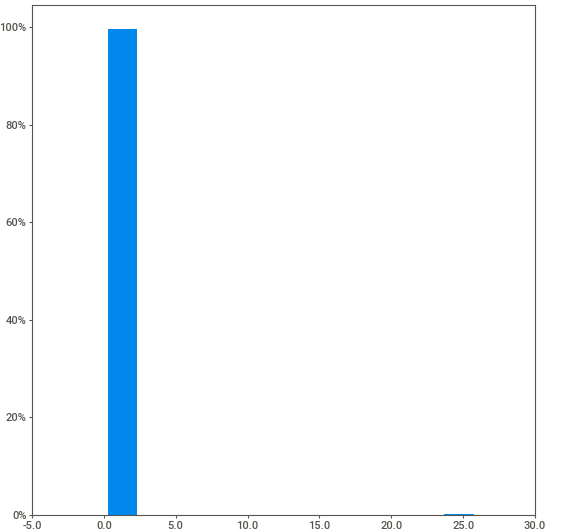
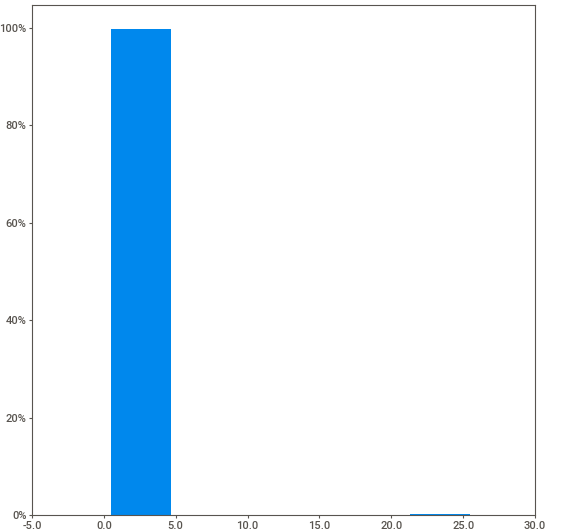
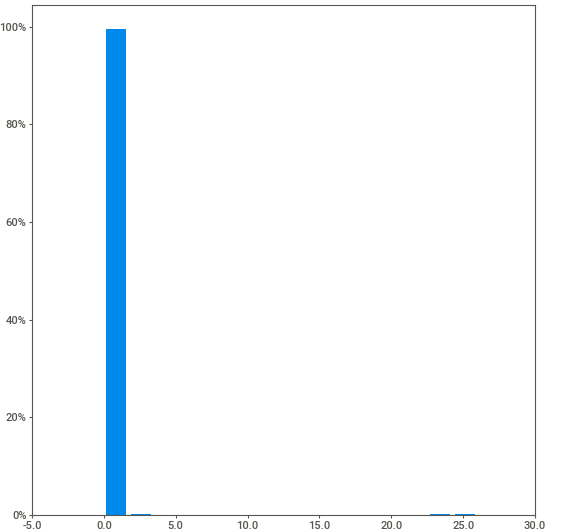
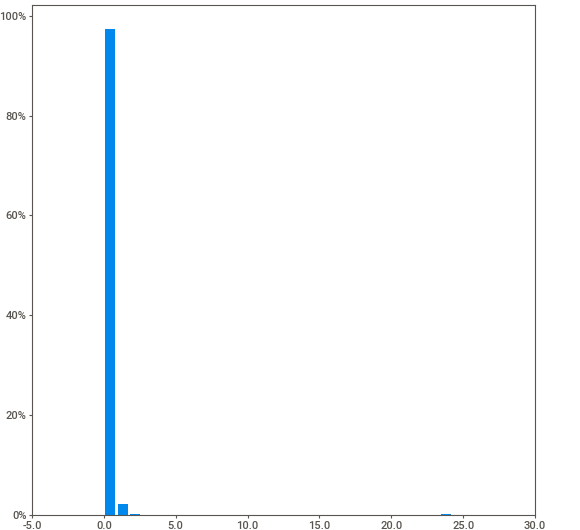
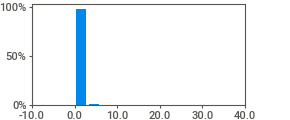
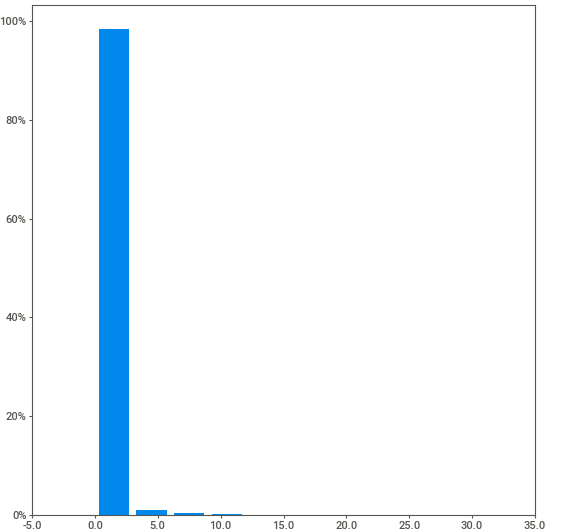
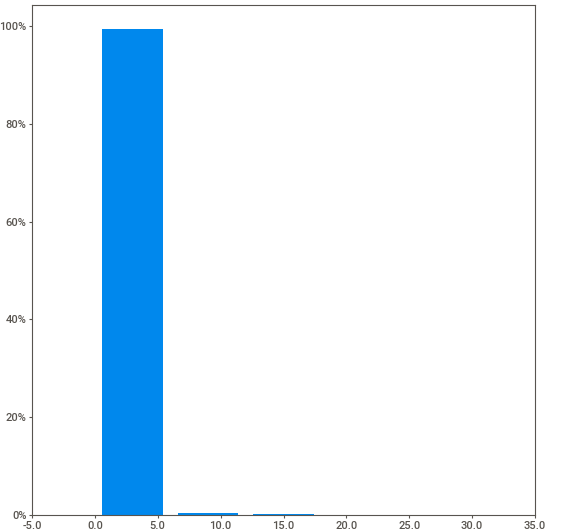
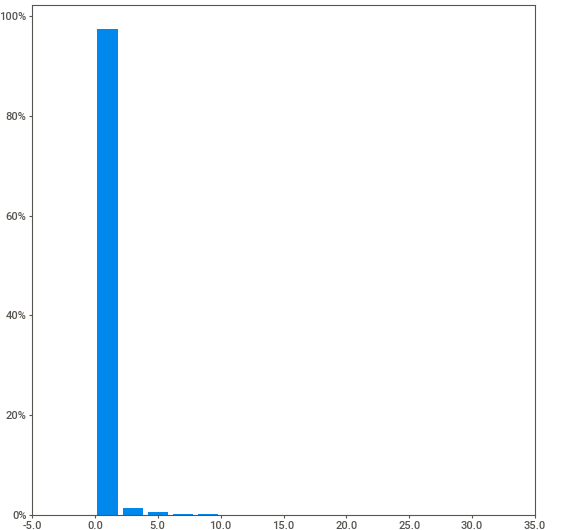
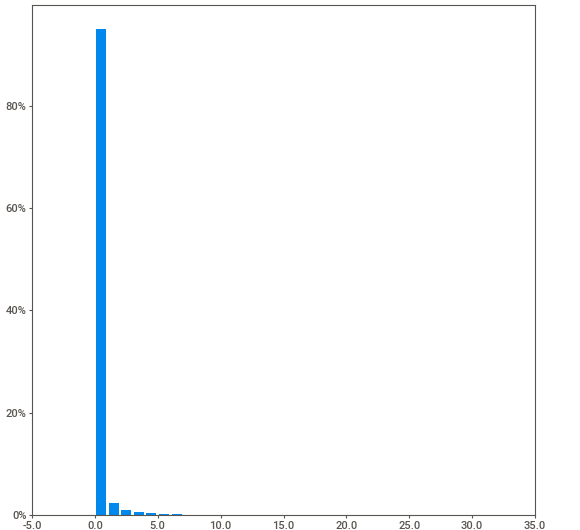
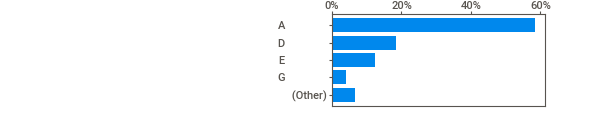
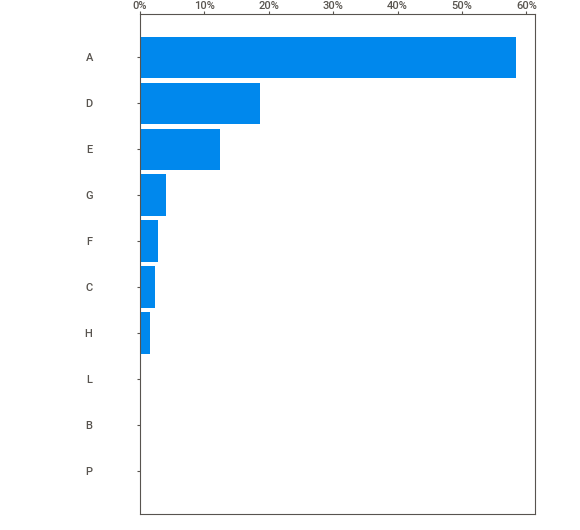
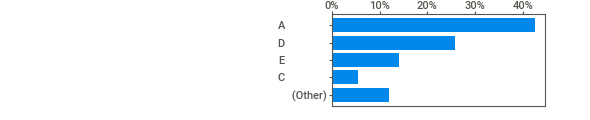
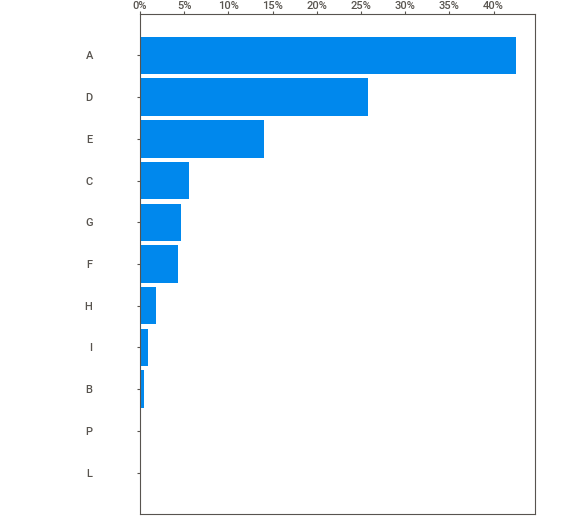
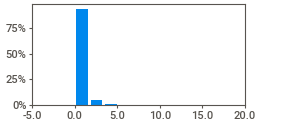
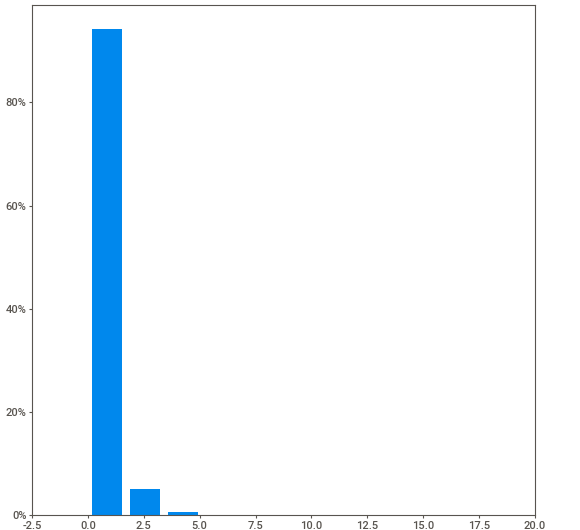
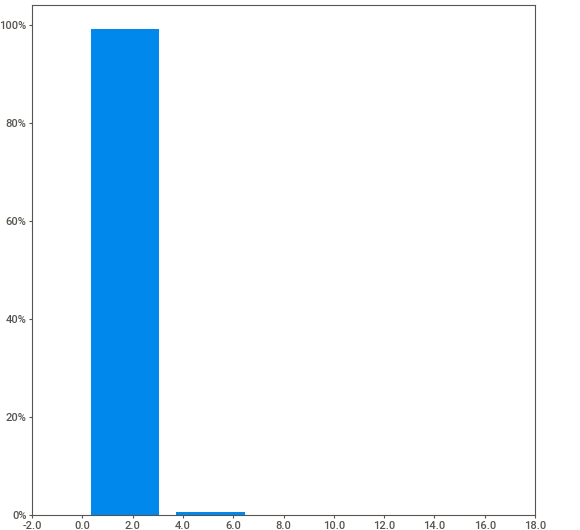
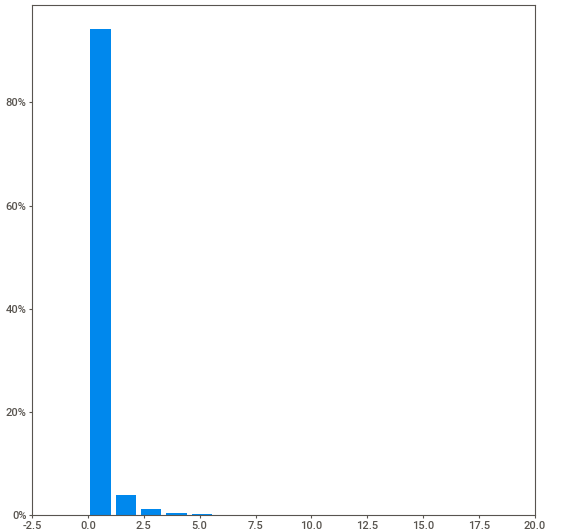
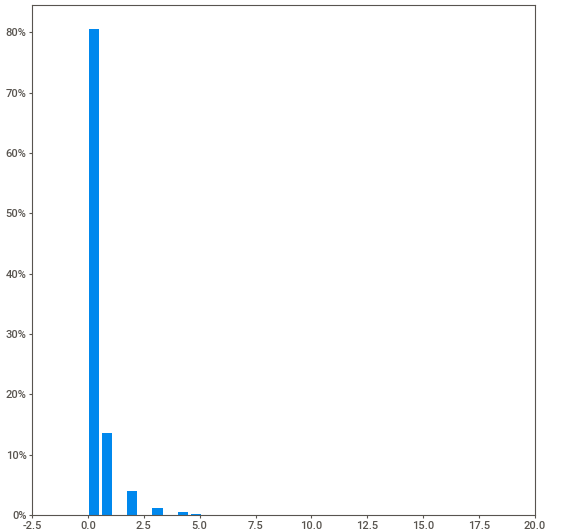
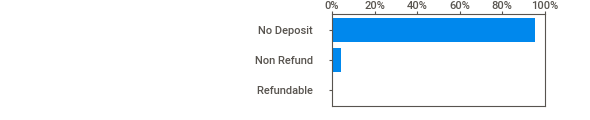
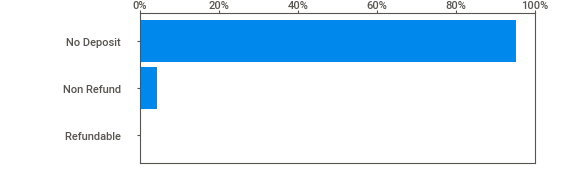
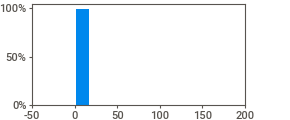
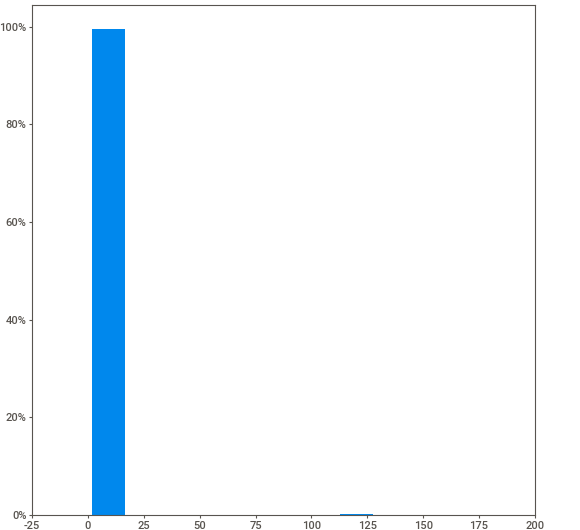
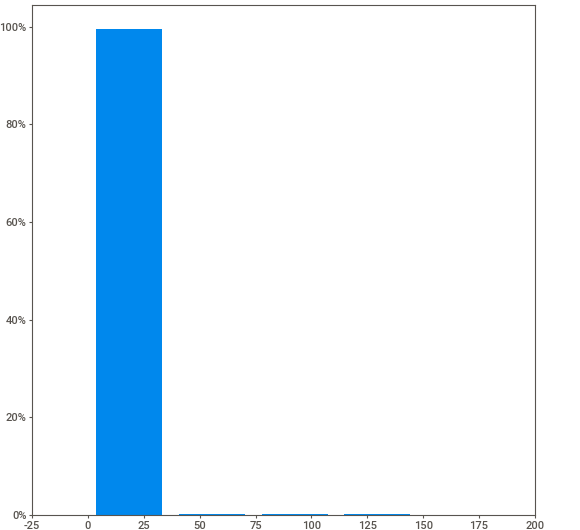
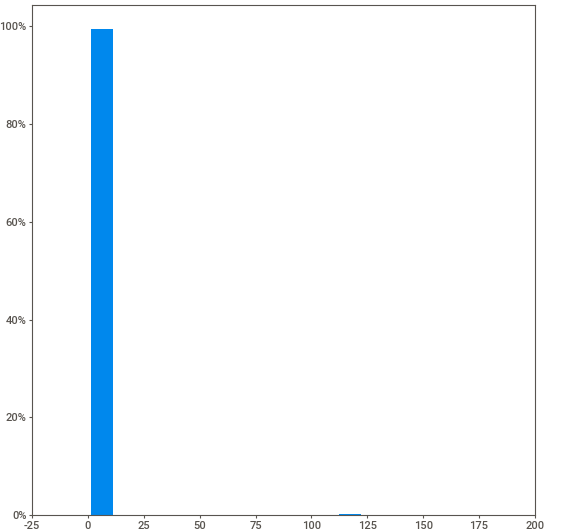
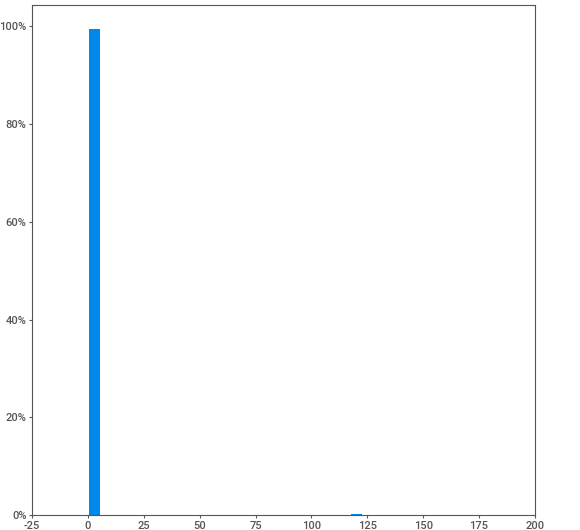
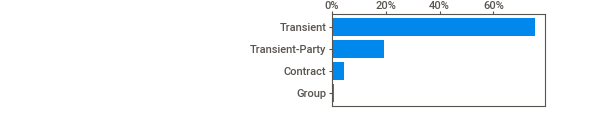
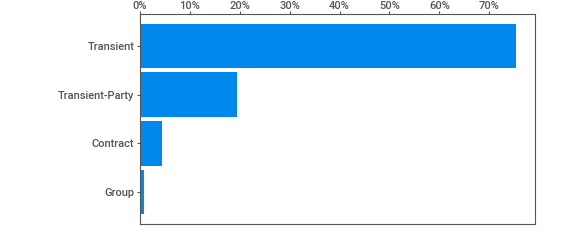
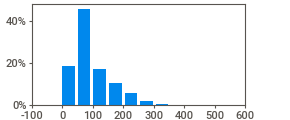
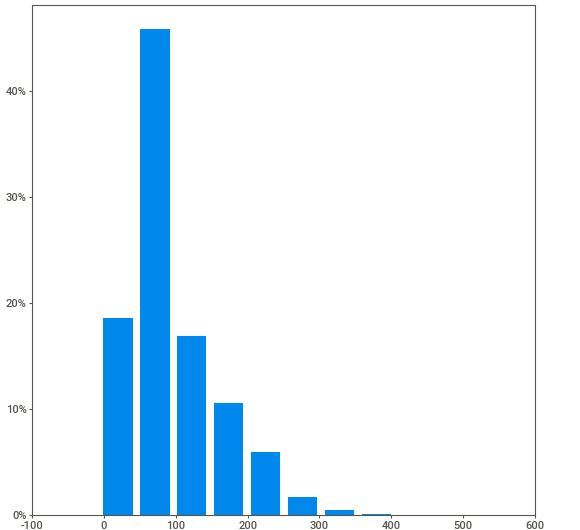
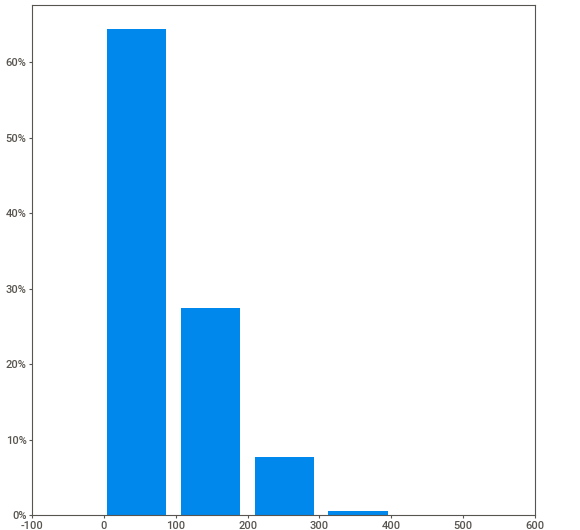
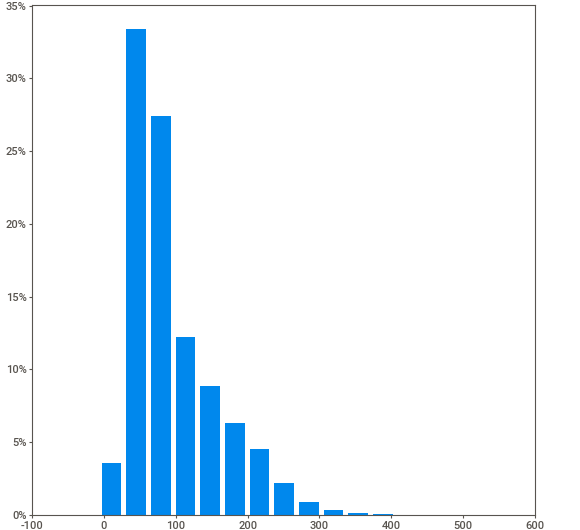
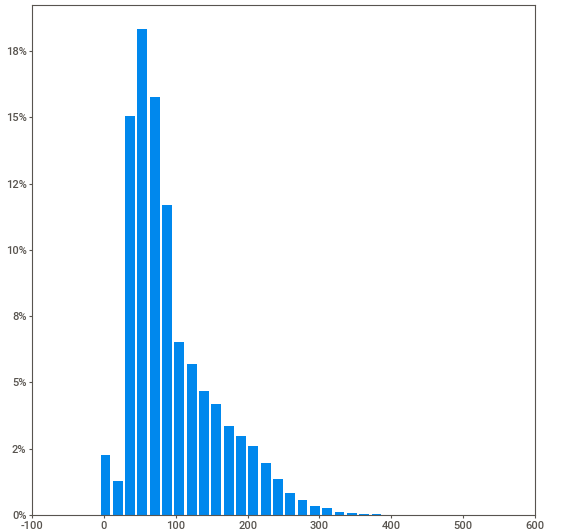
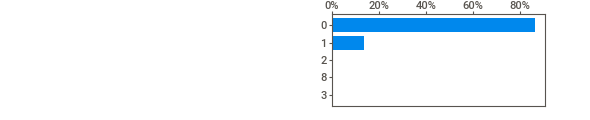
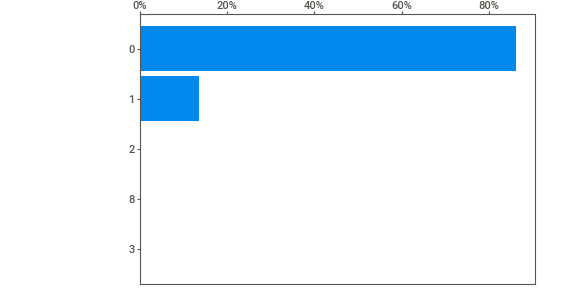
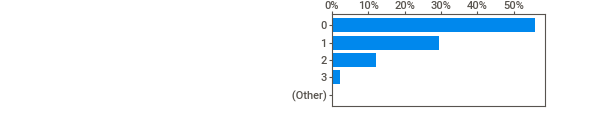
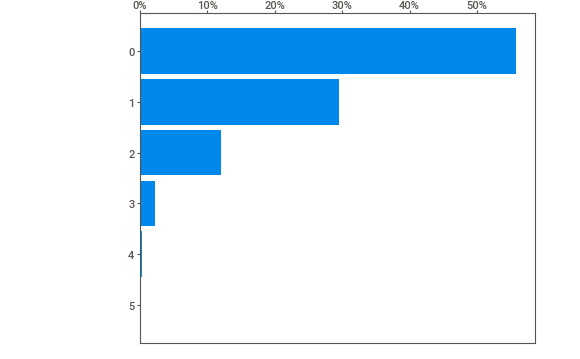
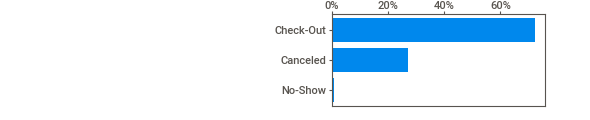
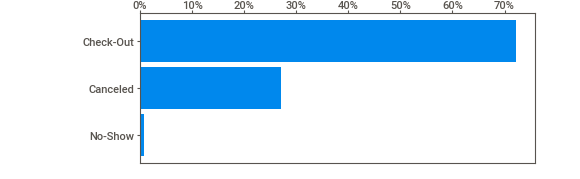
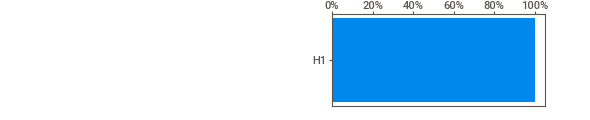
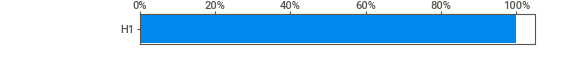

In [12]:
## Generate and display Sweetviz EDA report for Hotel 1
hotel = 'H1'
hotel_filter = (data['HotelNumber'] == hotel)

report = sv.analyze(data[hotel_filter],pairwise_analysis = 'off')
report.show_notebook()

In [ ]:
## Generate and display Sweetviz EDA report for Hotel 2
hotel = 2
hotel_filter = (data['HotelNumber'] == hotel)

report = sv.analyze(data[hotel_filter],pairwise_analysis = 'off')
report.show_notebook()

---

**Results**

Based on the report, each hotel exibits several numeric features with outliers, as well as several features with high cardinality. There are also several features showing a high degree of multicollinearity.

**Processing Steps**

* *Outliers* - Identify outliers using methods such as IQR, z-scores, and/or models such as IsolationForests. Investigate each reservation independently to determine whether to drop the column and to see if I can get any additional insights as to *why* the value is an outlier (e.g., erroneous data, etc.).

* *Cardinality* - Perform rare-label encoding to reduce the number of features (particularly important for one-hot encoding later).

* *Multicollinearity* - Use methods such as VIF to remove features with high multicollinearity.

---

## Summary Stats via Describe Method

In [ ]:
## Numeric Stats
data.describe(include = 'number')

---

- Outliers present in many features
- Outlier detection/removal may be required in preprocessing pipeline for certain model types

---

In [ ]:
## Non-Numeric Stats
data.describe(exclude = 'number')

---

- High cardinality in Country, Agent, Company (disregard UUID; reservation ID)

---

## Review Missing Values

In [ ]:
nan_sum = data.isna().sum()
nan_sum[nan_sum>0]

In [ ]:
nan_avg = data.isna().mean()
nan_avg[nan_avg>0]

---

- Two features missing values
- Average number of missing values less than 1%
- No action taken; will address in model pipeline

---

## Visualizing Data

***Deprecated - use Sweetviz instead.***

In [ ]:
# data_number = data.select_dtypes(include = 'number').columns
# data_non_num = data.select_dtypes(exclude = 'number').columns

### Numeric

In [ ]:
# data[data_number].hist(bins = 20, figsize = (18,21), layout = (-1, 5));

### Non-Numeric

In [ ]:
# vc_params = {'normalize':True, 'dropna': False, 'ascending': False}

# for col in data_non_num:
#     if data[col].nunique() < 10:
#         print(data[col].value_counts(**vc_params),'\n')
#     else:
#         print(data[col].value_counts(**vc_params)[:5], '\n')

---

Rare-Label Encoding for categories <5%. Binary encoding for features w/ low variance.

---

# Drop ReservationStatus

---

> `ReservationStatus` is nearly identical to my target feature and would be too strong of a predictor in my models.

---

In [ ]:
data[['ReservationStatus', 'IsCanceled']].value_counts()

In [ ]:
## Dropping "reservation_status"
data = data.drop(columns = ['ReservationStatus'])

In [ ]:
## Confirming 'reservation_status' removal from dataframe
'ReservationStatus' not in data

In [ ]:
data.to_feather('../data/data_post_eda.feather')